In [1]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(
    'E:\\Data Analysis Project\\Adult Dataset\\Dataset\\Adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [3]:
print("Dimention Dataset: {}".format(data.shape))

Dimention Dataset: (48842, 15)


In [4]:
data.iloc[:, :-1].describe().style.background_gradient(cmap = 'Accent')

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,189664.134597,10.078089,0.200319,0.114942,1.950698
std,1.295378,105604.025423,2.570973,0.746182,0.556924,0.897038
min,0.000000,12285.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,117550.500000,9.000000,0.000000,0.000000,2.000000
50%,2.000000,178144.500000,10.000000,0.000000,0.000000,2.000000
75%,3.000000,237642.000000,12.000000,0.000000,0.000000,2.000000
max,4.000000,1490400.000000,16.000000,4.000000,4.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
nandata = data.isna().sum()
nandata

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [7]:
data = data.drop(columns = ['native-country', 'relationship'])

In [8]:
os.chdir('E:\\Data Analysis Project\\Adult Dataset')

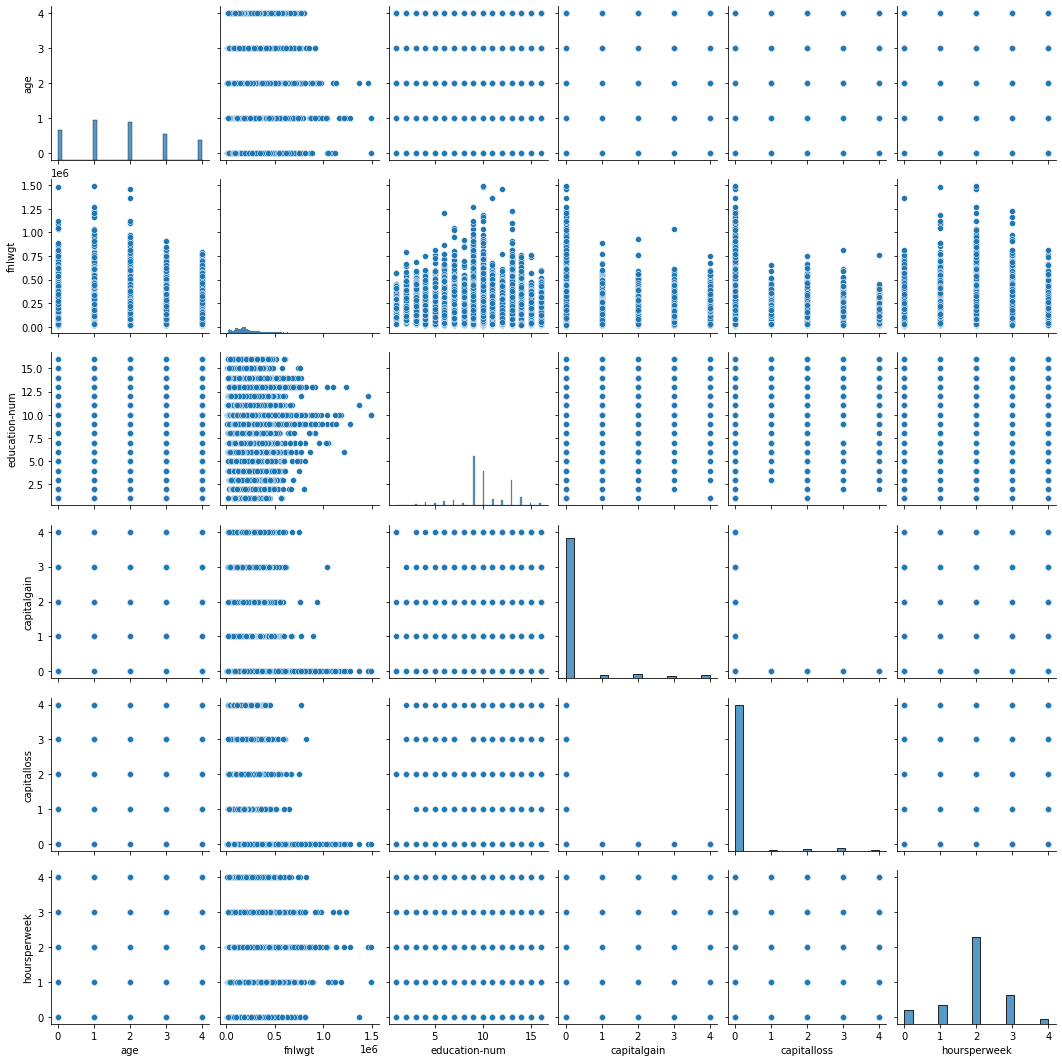

In [9]:
sns.pairplot(data.iloc[:, :-1], diag_kind = 'hist')
plt.savefig('Pair Plot.png')

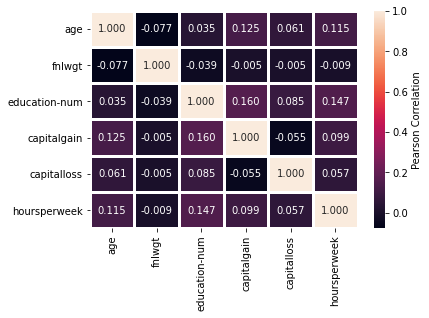

In [10]:
datacor = data.iloc[:, :-1].corr()
sns.heatmap(datacor, annot = True, lw = 3, fmt = '0.3f',
            cbar_kws = {'label' : 'Pearson Correlation'})
plt.savefig('heatmap.png')

In [11]:
data['target'] = data['class'].map({
    '<=50K' : 0, 
    '>50K' : 1
})
data = data.drop(columns = ['class'])

In [12]:
my_report = sv.analyze([data, 'data'], 
               target_feat = 'target')
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\Persian\Anaconda3\envs\Rpy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


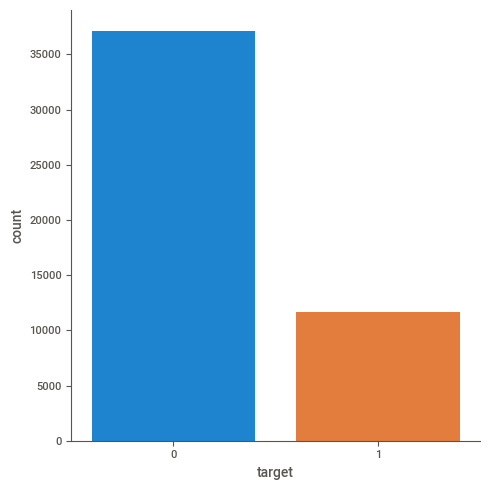

In [13]:
plt.figure(figsize = (5, 5))
sns.countplot(data['target'], label = 'Count')
sns.despine(top = True)
plt.tight_layout()
plt.savefig('BarPlot.png')

In [14]:
data['workclass'] = data['workclass'].map({
    'Private' : 0, 
    'Self-emp-not-inc' : 1, 
    'Local-gov' : 2, 
    'State-gov' : 3, 
    'Self-emp-inc' : 4, 
    'Federal-gov' : 5, 
    'Without-pay' : 6, 
    'Never-worked' : 7, 
})
data['marital-status'] = data['marital-status'].map({
    'Never-married' : 0, 
    'Married-civ-spouse' : 1, 
    'Married-AF-spouse' : 1, 
    'Married-spouse-absent' : 1, 
    'Widowed' : 2, 
    'Separated' : 3, 
    'Divorced' : 3
})
data['occupation'] = data['occupation'].map({
   'Prof-specialty' : 0, 
   'Craft-repair' : 1, 
   'Exec-managerial' : 2, 
   'Adm-clerical' : 3, 
   'Sales' : 4, 
   'Other-service' : 5, 
   'Machine-op-inspct' : 6, 
   'Transport-moving' : 7, 
   'Handlers-cleaners' : 8,  
   'Farming-fishing' : 9, 
   'Tech-support' : 10, 
   'Protective-serv' : 11, 
   'Priv-house-serv' : 12, 
   'Armed-Forces' : 13
})
data['race'] = data['race'].map({
   'White' : 0, 
   'Black' : 1, 
   'Asian-Pac-Islander' : 2, 
   'Amer-Indian-Eskimo' : 3, 
   'Other' : 4
})
data['education'] = data['education'].map({
  'HS-grad' : 0, 
  'Some-college' : 1, 
  'Bachelors' : 2, 
  'Masters' : 3, 
  'Assoc-voc' : 4, 
  '11th' : 5, 
  'Assoc-acdm' : 6, 
  '10th' : 7, 
  '7th-8th' : 8, 
  'Prof-school' : 9, 
  '9th' : 10, 
  '12th' : 11, 
  'Doctorate' : 12, 
  '5th-6th' : 13, 
  '1st-4th' : 14, 
  'Preschool' : 15
})
data['sex'] = data['sex'].map({
  'Male' : 1, 
  'Female' : 0
})

In [15]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
target               0
dtype: int64

In [16]:
data2 = data.iloc[data['occupation'].dropna().index]

In [17]:
data2.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
target            0
dtype: int64

In [18]:
cdat = pd.DataFrame(data2.values, columns = data.columns,
                    index=range(0,46033))

cdat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capitalgain,capitalloss,hoursperweek,target
0,2.0,3.0,77516.0,2.0,13.0,0.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0
1,3.0,1.0,83311.0,2.0,13.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,0.0,215646.0,0.0,9.0,3.0,8.0,0.0,1.0,0.0,0.0,2.0,0.0
3,3.0,0.0,234721.0,5.0,7.0,1.0,8.0,1.0,1.0,0.0,0.0,2.0,0.0
4,1.0,0.0,338409.0,2.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


In [19]:
scaler = MinMaxScaler()
scaler.fit(cdat.iloc[:, 0:12])
x = scaler.transform(cdat.iloc[:, 0:12])

In [20]:
cd = pd.DataFrame(x, columns = cdat.columns[0: -1])
cd['target'] = cdat['target']
cd.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capitalgain,capitalloss,hoursperweek,target
0,0.50,0.500000,0.043350,0.133333,0.800000,0.000000,0.230769,0.00,1.0,0.25,0.0,0.5,0.0
1,0.75,0.166667,0.047274,0.133333,0.800000,0.333333,0.153846,0.00,1.0,0.00,0.0,0.0,0.0
2,0.50,0.000000,0.136877,0.000000,0.533333,1.000000,0.615385,0.00,1.0,0.00,0.0,0.5,0.0
3,0.75,0.000000,0.149792,0.333333,0.400000,0.333333,0.615385,0.25,1.0,0.00,0.0,0.5,0.0
4,0.25,0.000000,0.219998,0.133333,0.800000,0.333333,0.000000,0.25,0.0,0.00,0.0,0.5,0.0


In [21]:
cd.isna().sum().sum()

0

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(cd.iloc[:,0:12], cd['target'], test_size = 0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [24]:
scoretrain1 = []
scoretest1 = []
auctrain1 = []
auctest1 = []
for i in range(1, 101):
    model1 = DecisionTreeClassifier(max_depth = i, random_state = 0).fit(xtrain, ytrain)
    scoretrain1.append(model1.score(xtrain, ytrain))
    scoretest1.append(model1.score(xtest, ytest))
    predtrain1 = model1.predict(xtrain)
    auctrain1.append(roc_auc_score(ytrain, predtrain1))
    predtest1 = model1.predict(xtest)
    auctest1.append(roc_auc_score(ytest, predtest1))

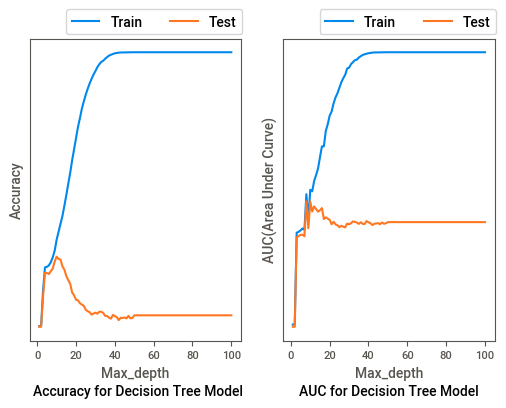

In [25]:
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), scoretrain1, label = 'Train')
plt.plot(range(1, 101), scoretest1, label = 'Test')
plt.tick_params(left = False, labelleft = False)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.text(-2, 0.733, 'Accuracy for Decision Tree Model')
plt.legend(bbox_to_anchor = (1.04, 1.12), ncol = 2)
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), auctrain1, label = 'Train')
plt.plot(range(1, 101), auctest1, label = 'Test')
plt.tick_params(left = False, labelleft = False)
plt.xlabel('Max_depth')
plt.ylabel('AUC(Area Under Curve)')
plt.text(4, 0.46, 'AUC for Decision Tree Model')
plt.legend(bbox_to_anchor = (1.04, 1.12), ncol = 2)

In [26]:
scoretrain2 = []
scoretest2 = []
auctrain2 = []
auctest2 = []
for i in range(1,11):
    model2 = KNeighborsClassifier(n_neighbors = i).fit(xtrain, ytrain)
    scoretrain2.append(model2.score(xtrain, ytrain))
    scoretest2.append(model2.score(xtest, ytest))
    predtrain2 = model2.predict(xtrain)
    auctrain2.append(roc_auc_score(ytrain, predtrain2))
    predtest2 = model2.predict(xtest)
    auctest2.append(roc_auc_score(ytest, predtest2))

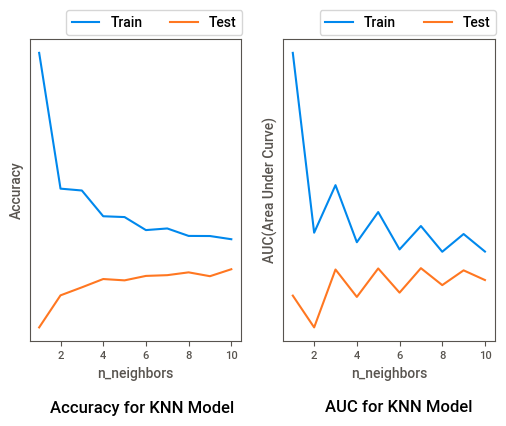

In [27]:
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), scoretrain2, label = 'Train')
plt.plot(range(1, 11), scoretest2, label = 'Test')
plt.tick_params(left = False, labelleft = False)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.text(1.5, 0.736, 'Accuracy for KNN Model', fontsize = 12)
plt.legend(bbox_to_anchor = (1.04, 1.12), ncol = 2)
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), auctrain2, label = 'Train')
plt.plot(range(1, 11), auctest2, label = 'Test')
plt.tick_params(left = False, labelleft = False)
plt.xlabel('n_neighbors')
plt.ylabel('AUC(Area Under Curve)')
plt.text(2.5, 0.6, 'AUC for KNN Model', fontsize = 12)
plt.legend(bbox_to_anchor = (1.04, 1.12), ncol = 2)